In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

### 3. Основные методы поиска оценок. Задача 3.
Условие: В банке каждую минуту подсчитывается баланс по сравнению с началом дня (6 часов утра). В полночь работники банка измеряют две величины: $X^1$ - максимальное значение баланса за день, $X^2$ - значение баланса в полночь. Считается, что величина $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - \exp^{-x^\gamma}(x > 0)$, где $\gamma > 0$ - параметр формы. В течение 10 лет каждый день банк проводил измерение величины $X$, получив в результате выборку $X_1, \ldots, X_{3652}$. В файле Weibull.csv находятся соответствующие измерения. 

Оцените параметр формы методом максимального правдоподобия
а) по первым 4 годам;
б) по всей выборке.
Оценку произведите по сетке (в логарифмической шкале). Известно, что $log_{10}\gamma \in [-2, 2]$. Выберите шаг равным $10^{-3}$.

In [2]:
#Считываем данные из файла Weibull.csv
data = []

file = open('Weibull.csv', 'r')
for str in file:
    for c in str.split():
        data.append(float(c))
file.close()

#### План решения:
1) Дифференцируем функцию распределения, находим плотность: 
$ p(x) = \gamma \cdot x^{\gamma - 1} e^{-x^{\gamma}} $
    
2) Функция правдоподобия:
$ f = \gamma^N \prod_{i=1}^{N} e^{-x^{\gamma}_i} \cdot x_i^{\gamma - 1} = \gamma^N e^{- \sum^N_{i=1} x^{\gamma}_i} \prod_{i=1}^{N} x_i^{\gamma - 1} $

3) Десятичный логарифм от функции правдоподобия:
$ L = N\lg \gamma - (\sum_{i=1}^{N} x_i^{\gamma})\lg(e) + (\gamma - 1) \cdot \sum_{i=1}^{N}\lg x_i $

Найдем по сетке значение $\lg\gamma$, в котором достигается максимум логарифмической функции правдоподобия.

In [3]:
#из условия известно, что десятичный логарифм параметра формы принадлежит
#интервалу [-2, 2] и шаг следует выбрать равным 0.001
lg_x = np.arange(-2, 2.001, 0.001)
x = 10**lg_x

In [4]:
#Функция вычисления десятичнологарифмической функции правдоподобия
#n - количество элементов из выборки
def lgLikelihoodFunction(n):
    L = np.zeros(len(lg_x))
    for i in range(len(x)):
        for k in data[0:n]:
            if k == 0:
                k = 0.0001 
            L[i] += lg_x[i] + (x[i] - 1) * np.log10(k) - (k ** x[i])*np.log10(np.e) 
    return L

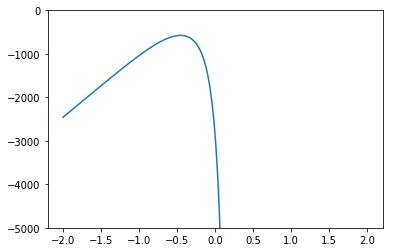

In [5]:
#Оценим параметр формы по данным выборки за первые 4 года:
L = lgLikelihoodFunction(1461)

#Построим график
plt.plot(lg_x, L)
plt.ylim([-5000, 0])
plt.show()

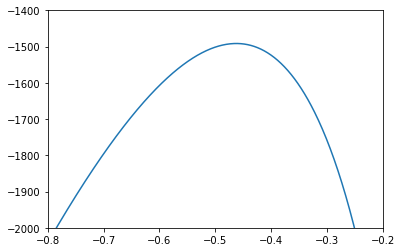

Значение максимума функции достигается в точке  [-0.462]


In [13]:
plt.plot(lg_x, L)
plt.ylim([-2000, -1400])
plt.xlim([-0.800, -0.200])
plt.show()

arg_max_1 = lg_x[np.where(L == max(L))]
print("Значение максимума функции достигается в точке ", arg_max_1)

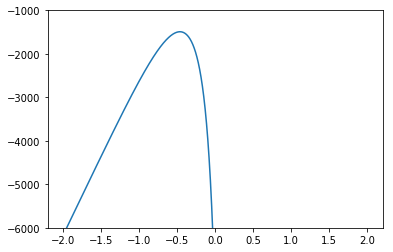

In [7]:
#Оценим параметр формы по полной выборке за 10 лет
L = lgLikelihoodFunction(3652)

#Построим график
plt.plot(lg_x, L)
plt.ylim([-6000, -1000])
plt.show()

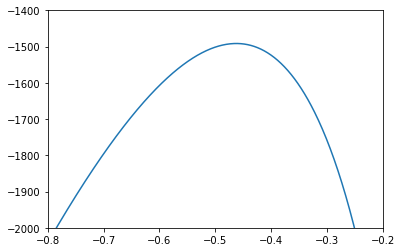

Значение максимума функции достигается в точке  [-0.462]


In [17]:
plt.plot(lg_x, L)
plt.ylim([-2000, -1400])
plt.xlim([-0.800, -0.200])
plt.show()

arg_max_2 = lg_x[np.where(L == max(L))]
print("Значение максимума функции достигается в точке ", arg_max_2)

In [9]:
print("Оценки параметра формы")
print("По первым 4 годам: ", 10**arg_max_1)
print("По всем 10 годам: ", 10**arg_max_2)

Оценки параметра формы
По первым 4 годам:  [0.35075187]
По всем 10 годам:  [0.34514374]


# Вывод:

Оценка параметра формы получилась равной 0.351 при рассмотрении данных выборки за первые 4 года. <br>
При рассмотрении полной выборки оценка равна 0.345.